# classification.cnn

> Fill in a module description here

In [ ]:
from monitosed.classification.core import *
from monitosed.data.core import *

from fastcore.xtras import Path
from tsai.all import *

%load_ext autoreload
%autoreload 2

In [ ]:
users, labels = get_users_labels('../_data/Smarthy2_Behavioral.xlsx', drop_ixs=[0,2,7, 12, 13, 16])

In [ ]:
path = Path("../_data/foot1/Rest"); path.ls()

(#14) [Path('../_data/foot1/Rest/VR23_RestStim_data_clean.mat'),Path('../_data/foot1/Rest/VR20_Reststim_data_clean.mat'),Path('../_data/foot1/Rest/VR26_Reststim_data_clean.mat'),Path('../_data/foot1/Rest/VR31_Reststim_data_clean.mat'),Path('../_data/foot1/Rest/VR27_Reststim_data_clean.mat'),Path('../_data/foot1/Rest/VR40_RestStim_data_clean.mat'),Path('../_data/foot1/Rest/VR51_RestStim_data_clean.mat'),Path('../_data/foot1/Rest/VR41_RestStim_data_clean.mat'),Path('../_data/foot1/Rest/VR38_RestStim_data_clean.mat'),Path('../_data/foot1/Rest/VR35_RestStim_data_clean.mat')...]

In [ ]:
mats = load_mats(path)

  0%|          | 0/2 [00:00<?, ?it/s]

Loading: VR23_RestStim_data_clean.mat
Loading: VR20_Reststim_data_clean.mat


In [ ]:
#Optional
signal_len = 1500

In [ ]:
x = stack_trials(mats, signal_len)
y = prepare_labels(mats, labels.values)
x.shape, y.shape

(torch.Size([19376, 1, 1500]), torch.Size([19376]))

In [ ]:
read_mats = [read_data(mat) for mat in mats]
rearranged_mats = [new_rearrange(mat) for mat in read_mats]

In [ ]:
splits = create_splits(mats)

In [ ]:
tfms  = [None, [TSRegression()]]
batch_tfms = TSStandardize(by_sample=True, by_var=True)
#dls = get_ts_dls(x, y, splits=splits, tfms=tfms, batch_tfms=batch_tfms, bs=128)
dls = get_ts_dls(x, y, splits=splits, tfms=tfms, bs=128)

In [ ]:
xb,yb = dls.one_batch(); xb,yb

(tensor([[[ 5.7587,  5.8145,  5.6909,  ..., -1.7350, -1.0917, -0.3039]],
 
         [[ 0.2592,  0.6001,  0.9024,  ...,  0.0878,  0.7782,  1.2575]],
 
         [[ 0.2450,  0.6713,  1.1601,  ...,  1.6509,  1.9004,  2.0456]],
 
         ...,
 
         [[ 0.9055,  1.9541,  2.8322,  ..., -0.5598, -0.0746,  0.3829]],
 
         [[-5.1401, -5.1290, -5.1660,  ..., -1.1601, -0.3699,  0.4581]],
 
         [[ 0.7476,  0.7960,  0.9922,  ...,  1.7452,  1.2210,  0.5381]]],
        device='cuda:0'),
 tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.

[<matplotlib.lines.Line2D>]

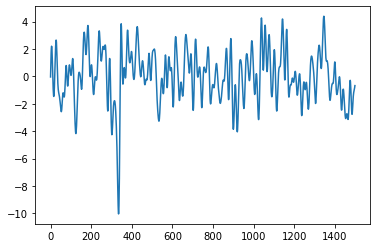

In [ ]:
plt.plot(xb[25][0].to('cpu').numpy())

SuggestedLRs(valley=0.0002754228771664202)

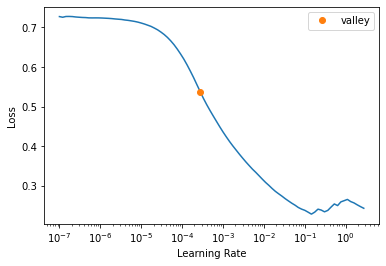

In [ ]:
learn = ts_learner(dls, InceptionTime, loss_func=CustomLoss(), metrics=[mae, rmse], wd=0.01, cbs=ShowGraph())
learn.lr_find()

epoch,train_loss,valid_loss,mae,_rmse,time
0,0.064472,0.203931,0.310527,0.311986,00:21
1,0.023797,0.260448,0.376841,0.379547,00:21
2,0.013522,0.197043,0.302270,0.303012,00:21
3,0.007995,0.191926,0.295992,0.296411,00:21
4,0.005808,0.183075,0.284699,0.285396,00:21


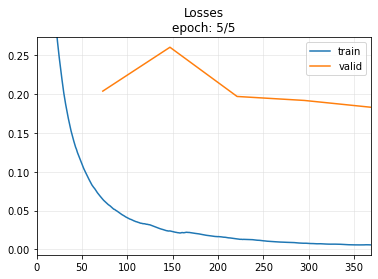

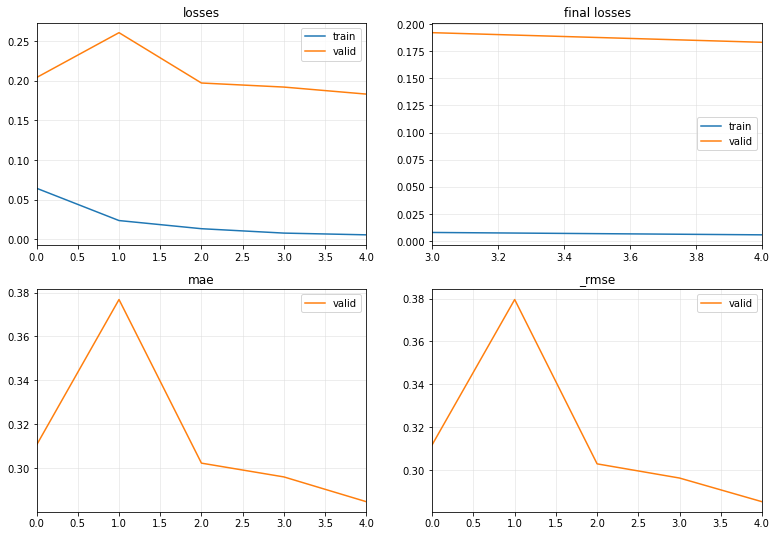

In [ ]:
learn.fit_one_cycle(5, 1e-3)

In [ ]:
ye_valid, y_valid = learn.get_preds()

In [ ]:
ye_valid

TensorBase([[1.0327],
        [1.0194],
        [1.0147],
        ...,
        [1.0063],
        [1.0032],
        [1.0098]])

In [ ]:
y_valid

torch.Size([9861])